In [2]:
from langgraph.graph import StateGraph,START,END
from typing import Annotated,TypedDict
from langchain_groq import ChatGroq
from langchain_core.messages import BaseMessage,HumanMessage
from dotenv import load_dotenv
import os
load_dotenv()
groq_api=os.getenv("test_groq")

In [4]:
model=ChatGroq(
    api_key=groq_api,
    model_name="openai/gpt-oss-20b"
)

In [6]:
from langgraph.graph.message import add_messages
class ChatState(TypedDict):
    messages:Annotated[list[BaseMessage],add_messages]

In [8]:
def chat_node(state:ChatState):
    
    messages=state['messages']
    
    response=model.invoke(messages)
    
    return {'messages':[response]}

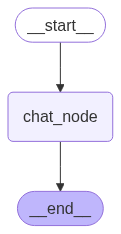

In [10]:
graph=StateGraph(ChatState)

graph.add_node('chat_node',chat_node)

graph.add_edge(START,'chat_node')
graph.add_edge('chat_node',END)
workflow=graph.compile()
workflow

In [11]:
initial_state={
    'messages':[HumanMessage(content="What is the capital of Argentina?")]
}
workflow.invoke(initial_state)

{'messages': [HumanMessage(content='What is the capital of Argentina?', additional_kwargs={}, response_metadata={}, id='d6ef4e9d-e104-4508-a442-f4294645bdeb'),
  AIMessage(content='The capital of Argentina is **Buenos Aires**.', additional_kwargs={'reasoning_content': 'We need to answer: capital of Argentina is Buenos Aires. Provide concise answer.'}, response_metadata={'token_usage': {'completion_tokens': 36, 'prompt_tokens': 78, 'total_tokens': 114, 'completion_time': 0.029978376, 'prompt_time': 0.005629995, 'queue_time': 0.054572155, 'total_time': 0.035608371}, 'model_name': 'openai/gpt-oss-20b', 'system_fingerprint': 'fp_fd68d84dd3', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--48083544-c35f-4ffc-b4fe-b48acfe4a5fd-0', usage_metadata={'input_tokens': 78, 'output_tokens': 36, 'total_tokens': 114})]}

In [17]:
workflow.invoke(initial_state)['messages'][-1].content

'The capital of Argentina is **Buenos Aires**.'

In [18]:
while True:
    
    user_message=input("Type here: ")
    print("User :",user_message)
    if user_message.strip().lower in ['exit','quit','bye']:
        break
    
    response=workflow.invoke({'messages':[HumanMessage(content=user_message)]})
    
    print('AI: ',response['messages'][-1].content)

User : can you teach me stats
AI:  Absolutely! 🎓 Let’s build a solid, step‑by‑step foundation in statistics that’s tailored to your interests and goals. I’ll start with a quick “needs assessment” so we can focus on what matters most to you, then outline a beginner‑friendly roadmap. Feel free to jump in with questions or let me know if you want to dive deeper into any topic.

---

## 1. Quick Check‑In

| Question | Why It Matters | Your Answer (optional) |
|---------|---------------|------------------------|
| **What’s your current experience?** (e.g., high school math, college, no background) | Helps gauge how much we need to build from scratch. |  |
| **What’s the main reason you want to learn stats?** (e.g., data science, research, business, curiosity) | Lets us prioritize relevant topics. |  |
| **Do you have a specific project or dataset you want to analyze?** | We can use real data for practice. |  |
| **Preferred learning style?** (visual, hands‑on, theory‑heavy, etc.) | We’ll ch

KeyboardInterrupt: Interrupted by user

In [19]:
from langgraph.checkpoint.memory import MemorySaver

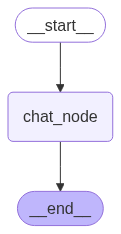

In [20]:
checkpointer=MemorySaver()

graph=StateGraph(ChatState)
graph=StateGraph(ChatState)

graph.add_node('chat_node',chat_node)

graph.add_edge(START,'chat_node')
graph.add_edge('chat_node',END)
chatbot=graph.compile(checkpointer=checkpointer)
chatbot

In [21]:
thread_id='1'
while True:
    
    user_message=input("Type here: ")
    print("User :",user_message)
    if user_message.strip().lower in ['exit','quit','bye']:
        break
    
    config={'configurable':{'thread_id':thread_id}}
    response=chatbot.invoke({'messages':[HumanMessage(content=user_message)]},config=config)
    
    print('AI: ',response['messages'][-1].content)

User : HI my name is gy
AI:  Hello, Gy! 👋 How can I help you today?
User : what's my name
AI:  You told me your name is Gy. If that’s not right or you’d like to share something else, just let me know!
User : yes i,m that guy
AI:  Got it! I'm here to help you, Gy. What would you like to talk about or work on today?
User : 
AI:  Sure thing! How can I assist you today? Whether it’s a question, a task, or just a chat, I’m all ears.
User : exit
AI:  Goodbye! If you need anything else later, just come back. Take care!
User : quit
AI:  Alright, I'll end the session now. If you need anything in the future, feel free to start a new conversation. Take care!


KeyboardInterrupt: Interrupted by user

In [22]:
chatbot.get_state(config)

StateSnapshot(values={'messages': [HumanMessage(content='HI my name is gy', additional_kwargs={}, response_metadata={}, id='4559e93d-f2a0-4f6e-a9f2-33f225c48a30'), AIMessage(content='Hello, Gy! 👋 How can I help you today?', additional_kwargs={'reasoning_content': 'The user says "HI my name is gy". They might want a greeting. The assistant should respond politely, ask for clarification or continue conversation. We can respond with greeting.'}, response_metadata={'token_usage': {'completion_tokens': 58, 'prompt_tokens': 76, 'total_tokens': 134, 'completion_time': 0.049364073, 'prompt_time': 0.005413677, 'queue_time': 0.044854173, 'total_time': 0.05477775}, 'model_name': 'openai/gpt-oss-20b', 'system_fingerprint': 'fp_fd68d84dd3', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--a8b74a79-b0af-4e83-8f2f-1ed7590b071a-0', usage_metadata={'input_tokens': 76, 'output_tokens': 58, 'total_tokens': 134}), HumanMessage(content="what's my name", additional_kwargs={}